## 라이브러리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import csv
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'NanumGothic'

## 파일 불러오기

In [2]:
import os
path = '../script'

# 다큐멘터리(0), 드라마(1), 영화(2) 선택
category = 2
if category == 0:
    path = path + '/Documentary'
elif category == 1:
    path = path + '/Drama'
else:
    path = path + '/Movie'

_list = os.listdir(path)
file_list = []
for file in _list:
    if file.startswith('.'): continue
    file_list.append(file)

print(len(file_list), file_list[:5])

46 ['About.Time', 'Arthur.Christmas', 'Baby.Driver', 'Baby.DriverBaby.Driver', 'Bad.Boys']


In [6]:
# 바로 위 코드에서 file_list를 참고하여 작품 선택
title = file_list[0]

file_name = 'unique_words_' + title + '.WEBRip.Netflix.en[cc]'
print(f'{path}/{title}/{file_name}')

../script/Movie/About.Time/unique_words_About.Time.WEBRip.Netflix.en[cc]


In [9]:
file = pd.read_csv(f'{path}/{title}/{file_name}.csv')
df_words_in_script = file
display(df_words_in_script.info(), df_words_in_script)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    1534 non-null   object
 1   counts  1534 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.1+ KB


None

,Word,counts
0,oh,181
1,yeah,124
2,okay,107
3,um,81
4,uh,65
...,...,...
1529,often,1
1530,devil,1
1531,developing,1
1532,detective,1


In [10]:
# df_result = pd.DataFrame(columns=['Word', 'oxford_level', 'oxford_version', 'lexile_grade', 'lexile_category', 'toefl', 'tsl', 'bsl', 'ngsl_freq', 'ngsl_sp_freq', 'naver_level', 'lemmetized'])
df_result = pd.DataFrame(columns=['Word'])
df_result

,Word


In [11]:
df_result['Word'] = df_words_in_script['Word']
df_result

,Word
0,oh
1,yeah
2,okay
3,um
4,uh
...,...
1529,often
1530,devil
1531,developing
1532,detective


## 단어 파일 불러와서 merge

### 한 파일 씩 할 때

In [8]:
# level = ['all_oxford', 'lexile_all_levels', 'ngsl_freq', 'ngsl_sp_freq']
# lemmas = ['awsl_with_lemmas', 'bsl_with_lemmas', 'ngsl_with_lemmas', 'tsl_with_lemmas']
# existence = ['toefl']
# file_name = existence[0]
# word_file = pd.read_csv(f'../words/{file_name}.csv')

In [9]:
# df_word = word_file
# display(df_word.info(), df_word)

In [10]:
# df_result = pd.merge(df_result, df_word, how='left', on='Word')
# df_result

### 전체 파일 처리할 때 
### 중복 컬럼이 있어서 파일 불러오고 merge할 때 컬럼 이름까지 수정

In [12]:
level = ['all_oxford', 'lexile_all_levels', 'ngsl_freq', 'ngsl_sp_freq']
lemmas = ['awsl_with_lemmas', 'bsl_with_lemmas', 'ngsl_with_lemmas', 'tsl_with_lemmas']
existence = ['toefl']

# Frequency 컬럼이 있는 파일 추가 시 수정 필요
for i in range(len(level)):
    file_name = level[i]
    word_file = pd.read_csv(f'../words/{file_name}.csv')
    df_word = word_file
    if i in [2, 3]:
        new_columns = ['', '', 'ngsl_freq', 'ngsl_sp_freq']
        df_word = df_word.rename(columns={'Frequency': new_columns[i]})
    df_result = pd.merge(df_result, df_word, how='left', on='Word')

# Lemmas 컬럼이 있는 파일 추가 시 수정 필요
for i in range(len(lemmas)):
    file_name = lemmas[i]
    word_file = pd.read_csv(f'../words/{file_name}.csv')
    df_word = word_file
    new_columns = ['awsl', 'bsl', 'ngsl', 'tsl']
    df_word = df_word.rename(columns={'Lemmas': new_columns[i]})
    df_result = pd.merge(df_result, df_word, how='left', on='Word')

# 현재 toefl 하나 뿐이어서 그대로 실행해도 되지만, 데이터 추가 시 수정 필요
for data in existence:
    file_name = data
    word_file = pd.read_csv(f'../words/{file_name}.csv')
    df_word = word_file
    df_word['toefl'] = True
    df_result = pd.merge(df_result, df_word, how='left', on='Word')

df_result = df_result.rename(columns={'Domain': 'lexile_category', 'Level': 'lexile_grade'})

df_result

,Word,oxford_level,oxford_version,lexile_category,lexile_grade,ngsl_freq,ngsl_sp_freq,awsl,bsl,ngsl,tsl,toefl
0,oh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,yeah,NaN,NaN,NaN,NaN,A1,A1,NaN,NaN,NaN,NaN,NaN
2,okay,NaN,NaN,NaN,NaN,A1,A1,NaN,NaN,okays;okayed;okaying;ok,NaN,NaN
3,um,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,uh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1531,often,NaN,NaN,NaN,NaN,A1,A1,NaN,NaN,NaN,NaN,NaN
1532,devil,C1,5000.0,NaN,NaN,B1,B1,NaN,NaN,NaN,NaN,NaN
1533,developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1534,detective,NaN,NaN,NaN,NaN,B1,B1,NaN,NaN,NaN,NaN,True


## 컬럼 정리
Word | oxford_level | oxford_version | lexile_grade | lexile_category | toefl | tsl | bsl | ngsl_freq | ngsl_sp_freq | naver_level | lemmetized

In [13]:
df_result.head(10)

,Word,oxford_level,oxford_version,lexile_category,lexile_grade,ngsl_freq,ngsl_sp_freq,awsl,bsl,ngsl,tsl,toefl
0,oh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,yeah,NaN,NaN,NaN,NaN,A1,A1,NaN,NaN,NaN,NaN,NaN
2,okay,NaN,NaN,NaN,NaN,A1,A1,NaN,NaN,okays;okayed;okaying;ok,NaN,NaN
3,um,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,uh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,well,A1,3000.0,NaN,NaN,A1,A1,unwell;;wellbeing;wellknown;wellness,NaN,wells;welled;welling,NaN,NaN
6,one,A1,3000.0,NaN,NaN,A1,A1,noone;oneness;oneself,NaN,ones,NaN,NaN
7,like,NaN,NaN,NaN,NaN,A1,A1,dislike;;likeable;likeably,NaN,likes;liked;liking,NaN,NaN
8,know,NaN,NaN,NaN,NaN,A1,A1,knowable;knowingly;unknowable;unknowing;unknow...,NaN,knows;knew;knowing;known,NaN,NaN
9,right,A2,3000.0,NaN,NaN,A1,A1,righthand;righthander;rightist;rightmost,NaN,rights;righted;righting;righter,NaN,NaN


In [14]:

for column in df_result.columns:
    if column in ['Word', 'awsl', 'bsl', 'ngsl', 'tsl']: continue
    print(column, ':', df_result[column].unique())


oxford_level : [nan 'A1' 'A2' 'B2' 'B1' 'C1']
oxford_version : [  nan 3000. 5000.]
lexile_category : [nan 'math' 'social_studies' 'science' 'general']
lexile_grade : [nan  2.  1.  3.  9.  5.  6.  4.]
ngsl_freq : [nan 'A1' 'A3' 'A2' 'C1' 'B1' 'C3' 'B3' 'C4' 'A4' 'B2' 'C2' 'C5']
ngsl_sp_freq : [nan 'A1' 'A2' 'A3' 'C1' 'A4' 'C2' 'B1' 'C3' 'B2' 'B3']
toefl : [nan True]


## 단어 형태 모음(-sl)들을 있다면 True 없다면 False로 변환

In [15]:
df_result['awsl'] = df_result['awsl'].notnull()
df_result['bsl'] = df_result['bsl'].notnull()
df_result['ngsl'] = df_result['ngsl'].notnull()
df_result['tsl'] = df_result['tsl'].notnull()
df_result['toefl'] = df_result['toefl'].notnull()
df_result.head(10)
# df_result['toefl'].value_counts()

,Word,oxford_level,oxford_version,lexile_category,lexile_grade,ngsl_freq,ngsl_sp_freq,awsl,bsl,ngsl,tsl,toefl
0,oh,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
1,yeah,NaN,NaN,NaN,NaN,A1,A1,False,False,False,False,False
2,okay,NaN,NaN,NaN,NaN,A1,A1,False,False,True,False,False
3,um,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
4,uh,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
5,well,A1,3000.0,NaN,NaN,A1,A1,True,False,True,False,False
6,one,A1,3000.0,NaN,NaN,A1,A1,True,False,True,False,False
7,like,NaN,NaN,NaN,NaN,A1,A1,True,False,True,False,False
8,know,NaN,NaN,NaN,NaN,A1,A1,True,False,True,False,False
9,right,A2,3000.0,NaN,NaN,A1,A1,True,False,True,False,False


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


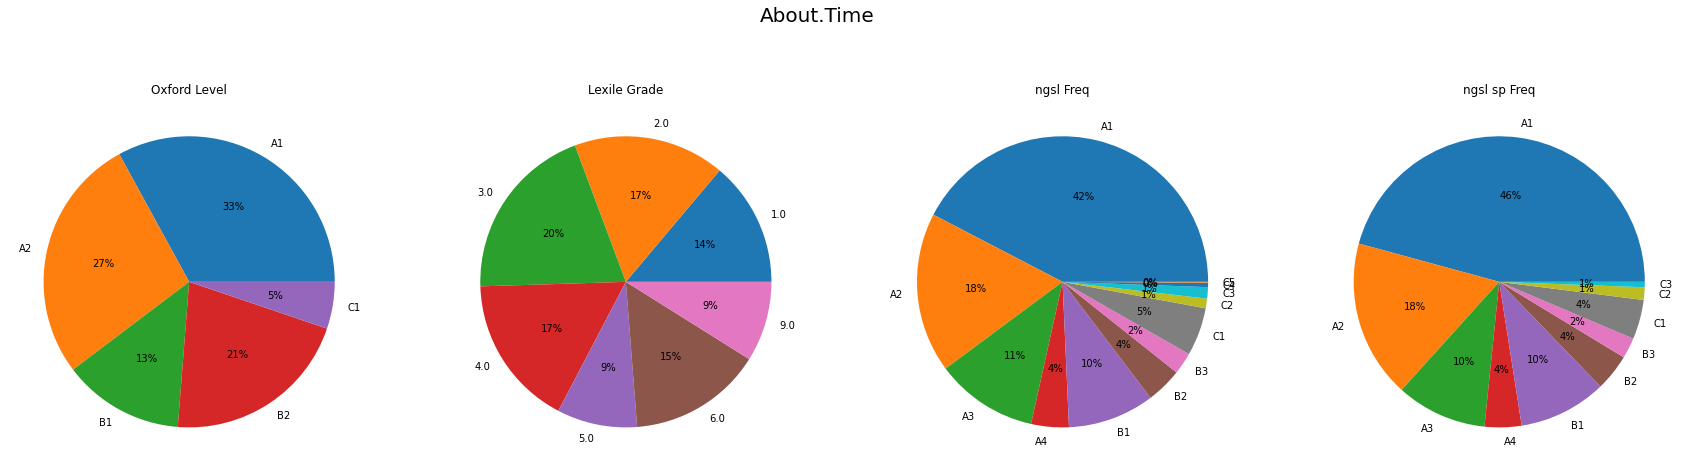

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(30, 8), facecolor='white')
fig.suptitle(title, fontsize=20)
result = df_result['oxford_level'].value_counts().sort_index()
axes[0].pie(result, labels=result.index, autopct = "%1.0f%%")
axes[0].set_title('Oxford Level')   

result = df_result['lexile_grade'].value_counts().sort_index()
axes[1].pie(result, labels=result.index,  autopct = "%1.0f%%")
axes[1].set_title('Lexile Grade')

result = df_result['ngsl_freq'].value_counts().sort_index()
axes[2].pie(result, labels=result.index,  autopct = "%1.0f%%")
axes[2].set_title('ngsl Freq')

result = df_result['ngsl_sp_freq'].value_counts().sort_index()
axes[3].pie(result, labels=result.index,  autopct = "%1.0f%%")
axes[3].set_title('ngsl sp Freq')

plt.show()

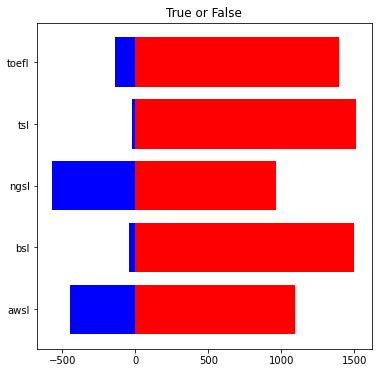

In [17]:
# awsl bsl ngsl tsl toefl
result = pd.DataFrame()
result['awsl'] = df_result['awsl'].value_counts()
result['bsl'] = df_result['bsl'].value_counts()
result['ngsl'] = df_result['ngsl'].value_counts()
result['tsl'] = df_result['tsl'].value_counts()
result['toefl'] = df_result['toefl'].value_counts()
# result

plt.figure(figsize = (6,6))
plt.barh(result.columns, -result.loc[True], color='b')
plt.barh(result.columns, result.loc[False], color='r')
plt.title('True or False')
plt.show()

In [18]:
df_graph = df_result.copy()
df_graph = df_graph.drop(columns=('Word'))
df_graph.head()


,oxford_level,oxford_version,lexile_category,lexile_grade,ngsl_freq,ngsl_sp_freq,awsl,bsl,ngsl,tsl,toefl
0,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
1,NaN,NaN,NaN,NaN,A1,A1,False,False,False,False,False
2,NaN,NaN,NaN,NaN,A1,A1,False,False,True,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False


In [19]:
all_result = pd.DataFrame()
all_result['oxford_level'] = df_result['oxford_level'].notnull().value_counts()
all_result['oxford_version'] = df_result['oxford_version'].notnull().value_counts()
all_result['lexile_category'] = df_result['lexile_category'].notnull().value_counts()
all_result['lexile_grade'] = df_result['lexile_grade'].notnull().value_counts()
all_result['ngsl_freq'] = df_result['ngsl_freq'].notnull().value_counts()
all_result['ngsl_sp_freq'] = df_result['ngsl_sp_freq'].notnull().value_counts()
all_result['awsl'] = df_result['awsl'].value_counts()
all_result['bsl'] = df_result['bsl'].value_counts()
all_result['ngsl'] = df_result['ngsl'].value_counts()
all_result['tsl'] = df_result['tsl'].value_counts()
all_result['toefl'] = df_result['toefl'].value_counts()
all_result = all_result.sort_index(ascending=False)
all_result

# df_result['toefl'].value_counts()

,oxford_level,oxford_version,lexile_category,lexile_grade,ngsl_freq,ngsl_sp_freq,awsl,bsl,ngsl,tsl,toefl
True,461,461,101,101,1029,1003,443,41,570,23,139
False,1075,1075,1435,1435,507,533,1093,1495,966,1513,1397


In [20]:
all_result = all_result.transpose()
all_result

,True,False
oxford_level,461,1075
oxford_version,461,1075
lexile_category,101,1435
lexile_grade,101,1435
ngsl_freq,1029,507
ngsl_sp_freq,1003,533
awsl,443,1093
bsl,41,1495
ngsl,570,966
tsl,23,1513


Text(0.5, 1.0, 'All Words Ratio')

<Figure size 360x216 with 0 Axes>

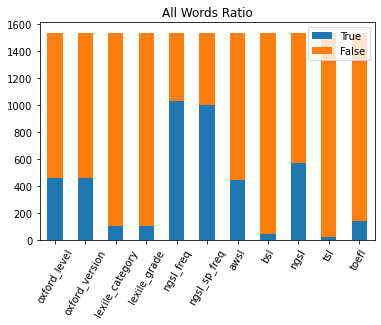

In [21]:
plt.figure(figsize=(5,3))
all_result.plot.bar(stacked=True, rot=60)
plt.title('All Words Ratio')
